In [7]:
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.io import loadmat
from sklearn import preprocessing
%matplotlib inline
sns.set()
sns.set_style('white')

(50, 2)

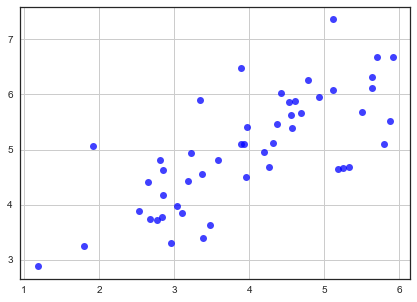

In [17]:
data1 = loadmat('ex7data1.mat')
X = data1['X']
plt.figure(figsize = (7, 5))
plt.plot(X[:, 0], X[:, 1], 'o', color = 'b', alpha=0.75)
plt.grid(True)

In [73]:
def normalizer (x):
    return preprocessing.scale(x)

In [74]:
def covariance (x):
    return np.cov(x)

In [75]:
def SVD (x):
    return sc.linalg.svd(x)

In [148]:
normalX = normalizer(X)
covarianceX = covariance(normalX.T)
U, S, V = SVD(covarianceX)

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [141]:
mean = np.mean(X, axis = 0)

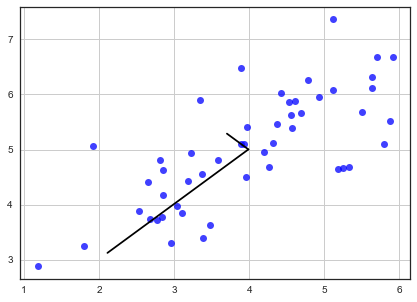

In [142]:
plt.figure(figsize = (7, 5))
plt.plot(X[:, 0], X[:, 1], 'o', color = 'b', alpha=0.75)
plt.grid(True)
plt.plot([mean[0], mean[0] + 1.5 * S[0] * U[0, 0]], [mean[1], mean[1] + 1.5 * S[0] * U[0, 1]], color = 'k')
plt.plot([mean[0], mean[0] + 1.5 * S[1] * U[1, 0]], [mean[1], mean[1] + 1.5 * S[1] * U[1, 1]], color = 'k')

In [158]:
def projectData (x, u, k):
    return np.dot(x, u[:, :k])

In [177]:
def recoverData (z, u, k):
    return np.dot(z, u[:, :k].T)

In [216]:
Z = projectData(normalX, U, 1)
xAprrox = recoverData(Z, U, 1)

-1.0580527922154783

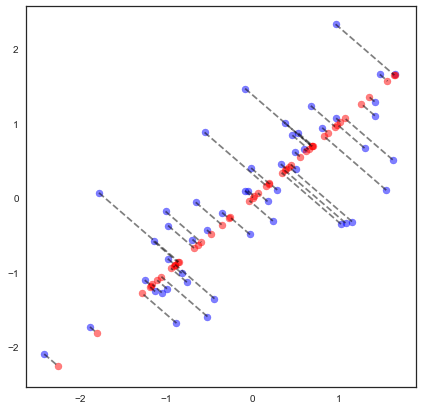

In [235]:
plt.figure(figsize = (7, 7))
plt.scatter(normalX[:, 0], normalX[:, 1], s = 50, color = 'b', alpha = 0.5, edgecolors = 'b')
plt.scatter(xAprrox[:, 0], xAprrox[:, 1], s = 50, color = 'r', alpha = 0.5, edgecolors = 'r')
for number in range(len(xAprrox)):
    plt.plot([normalX[number, 0], xAprrox[number, 0]], [normalX[number, 1], xAprrox[number, 1]], 'k--', alpha = 0.5)